In [1]:
import numpy as np
import matplotlib.pyplot as plt
from infohdp.generators import gen_prior_pij, gen_nasty_pij, gen_prior_pij_t, gen_samples_prior, gen_samples_prior_t
from infohdp.core import strue, itrue
from infohdp.utils import dkm2, nxysam
from infohdp.estimators import NaiveEstimator, NSBEstimator, BinaryInfoHDPEstimator, MulticlassInfoHDPEstimator

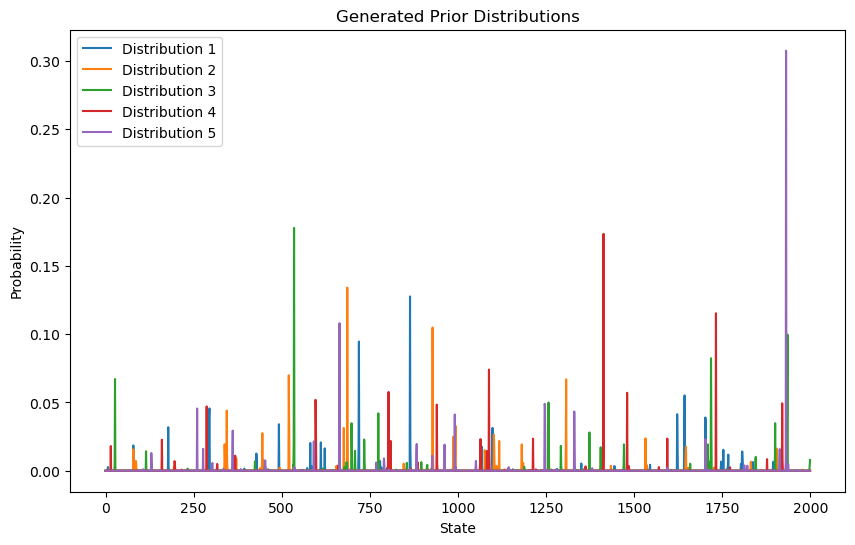

In [2]:
# Set the seed
np.random.seed(1)

# Example 1: Generate prior pij
alpha = 10.0
beta = 0.5
ndist = 5
Ns = 1000

pij = gen_prior_pij(alpha, beta, ndist, Ns)

plt.figure(figsize=(10, 6))
for i in range(ndist):
    plt.plot(pij[i], label=f'Distribution {i+1}')
plt.title('Generated Prior Distributions')
plt.xlabel('State')
plt.ylabel('Probability')
plt.legend()
plt.show()


In [ ]:
# Example 2: Generate nasty pij
# alfa = 10.0
# psure = 0.9
# type_nasty = 1

# nasty_pij = gen_nasty_pij(alfa, psure, type_nasty, ndist, Ns)

# plt.figure(figsize=(10, 6))
# for i in range(ndist):
#     plt.plot(nasty_pij[i], label=f'Distribution {i+1}')
# plt.title('Generated Nasty Distributions')
# plt.xlabel('State')
# plt.ylabel('Probability')
# plt.legend()
# plt.show()



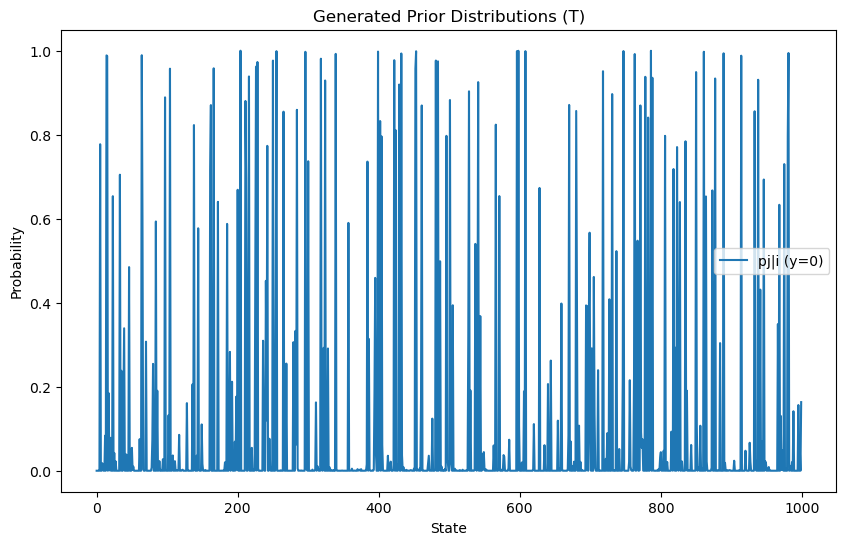

In [3]:
# Example 3: Generate prior pij_t
qy = [0.6, 0.3, 0.1]  # Example marginal distribution for Y
pi, pjdadoi, pij_t = gen_prior_pij_t(alpha, beta, qy, Ns)

plt.figure(figsize=(10, 6))
#plt.plot(pi, label='pi')
plt.plot(pjdadoi[:, 2], label='pj|i (y=0)')
#plt.plot(pjdadoi[:, 1], label='pj|i (y=1)')
plt.title('Generated Prior Distributions (T)')
plt.xlabel('State')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [4]:
# Set the seed
np.random.seed(1)

print(pij[0].shape)

print(f"True entropy: {strue(pij[0]):.2f}")
print(f"True mutual information: {itrue(pij[0]):.2f}")

M = 50
samples = gen_samples_prior(pij[0], M, Ns)

# Create an instance of NaiveEstimator and one of NSBEstimator
naive_estimator = NaiveEstimator()
nsb_estimator = NSBEstimator()
ihdp_estimator = BinaryInfoHDPEstimator()

print(f"Naive entropy: {naive_estimator.estimate_entropy(samples):.2f}")
s_nsb, ds_nsb = nsb_estimator.estimate_entropy(samples)
print(f"NSB entropy: {s_nsb:.2f} ± {ds_nsb:.2f}")

print(f"Naive info: {naive_estimator.estimate_mutual_information(samples):.4f}")
i_nsb, di_nsb = nsb_estimator.estimate_mutual_information(samples)
print(f"NSB info: {i_nsb:.4f} ± {di_nsb:.4f}")
print(f"Ihdp info: {ihdp_estimator.estimate_mutual_information(samples):.4f}")

(2000,)
True entropy: 3.62
True mutual information: 0.22
Naive entropy: 2.98
NSB entropy: 3.53 ± 0.22
Naive info: 0.5803
NSB info: 0.5839 ± 0.3183
Ihdp info: 0.4938


In [5]:
import pandas as pd

dfp = pd.DataFrame(pij[0])
dfs = pd.DataFrame(samples)

# Save to CSV without index
dfp.to_csv('pij0.csv', index=False, header=False)
dfs.to_csv('samples0.csv', index=False, header=False)

In [10]:
print(pij_t.shape)

print(f"True entropy: {strue(pij_t):.4f}")
#print(f"True mutual information: {itrue(pij[0]):.2f}")

# Set the seed
np.random.seed(1)
M = 50
samples_t = gen_samples_prior_t(pi,pjdadoi, M, Ns)

# Create an instance of NaiveEstimator and one of NSBEstimator
naive_estimator = NaiveEstimator()
nsb_estimator = NSBEstimator()
ihdpt_estimator = MulticlassInfoHDPEstimator()

print(f"Naive entropy: {naive_estimator.estimate_entropy(samples_t):.4f}")
s_nsb, ds_nsb = nsb_estimator.estimate_entropy(samples_t)
print(f"NSB entropy: {s_nsb:.4f} ± {ds_nsb:.4f}")

print(f"True mutual information: {itrue(pij_t):.4f}")
print(f"Naive info: {naive_estimator.estimate_mutual_information(samples_t):.4f}")
i_nsb, di_nsb = nsb_estimator.estimate_mutual_information(samples_t)
print(f"NSB info: {i_nsb:.4f} ± {di_nsb:.4f}")
print(f"Ihdp(MAP)T info: {ihdpt_estimator.estimate_mutual_information(samples_t):.4f}")

nn = len(samples_t)
distsam = {s[1] for s in samples_t}
ny = len(distsam)
nxy = nxysam(samples_t, ny)
qye = (np.sum(nxy, axis=0) + 1/ny) / (np.sum(nxy) + 1)
print(qye)
print(qy)

print(f"Ihdp(MAP)T bsolT: {ihdpt_estimator.bsolT(qye, nxy):.4f}")
print(f"Ihdp(MAP)T logLbT: {ihdpt_estimator.logLbT(0.2,qye, nxy):.4f}")

(1000, 3)
True entropy: 3.2494
Naive entropy: 2.5806
NSB entropy: 2.8732 ± 0.1771
True mutual information: 0.6506
Naive info: 0.7326
NSB info: 0.7274 ± 0.2628
Ihdp(MAP)T info: 0.0000
[0.51633987 0.41830065 0.06535948]
[0.6, 0.3, 0.1]
Ihdp(MAP)T bsolT: 22026.3195
Ihdp(MAP)T logLbT: -96.1726


In [7]:
print(nxy.shape)
print(nxy)

(14, 3)
[[2 0 0]
 [1 0 0]
 [1 0 0]
 [1 6 0]
 [4 0 0]
 [6 0 0]
 [1 0 0]
 [3 0 3]
 [3 0 0]
 [2 0 0]
 [0 8 0]
 [0 4 0]
 [2 0 0]
 [0 3 0]]


In [8]:
import pandas as pd

dfpt = pd.DataFrame(pij_t)
dfst = pd.DataFrame(samples_t)

# Save to CSV without index
dfpt.to_csv('pij_t.csv', index=False, header=False)
dfst.to_csv('samples_t.csv', index=False, header=False)